In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Functions

In [2]:
def image_segmentation (frame, file_name):
    img_rgb = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    # preprocessing:
    # modify the brightness of the image 
    # we need to solve the problem of background color in the area close to the bottom of the yellow glass
    # othewrise we had problem in image segmentation
    # gamma transformation are good for contrast manipulation
    gammaImg = gammaCorrection(img_rgb, 2.2)
    # convert to YUV model color
    img_yuv = cv.cvtColor(gammaImg, cv.COLOR_RGB2YUV)
    # Normalize UV channels between [-0.5 ... 0.5]
    UV = img_yuv[:,:,1:3] / 255.0 - 0.5 
    # we choosed 0.4 -0.4 based on the UV plane (blue)
    mask = chroma_distance( UV, 0.4, -0.4 )
    # correspond to left part of the image that correspond always to foreground 
    mask[:,1220:] = 0.51
    # right part of the image (background)
    mask[:,:250] = 0.4
    # color pixel:
    # foreground white
    mask[mask > 0.5 ] = 255
    # background black
    mask[mask <= 0.5 ] = 0
    # parrot
    if file_name == "obj01":
        return morphological_operation_parrot(mask)
    else:
        if  file_name == "obj03":
             # cracker
            return morphological_operation_cracker(mask)
        else:
            return morphological_operation(mask)

In [3]:
# used to correct the brightness of an image 
#  src image we want to apply gamma correction
def gammaCorrection(src, gamma):
    invGamma = 1 / gamma
    # build a lookup table mapping the pixel values [0, 255] to their adjusted gamma values
    #  scale the pixel intensities to the range [0, 1.0], apply the transform, and then scale back to the range [0, 255]
    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)
    # The function LUT fills the output array with values from the look-up table
    return cv.LUT(src, table)

In [4]:
# calculate euclidian distance between color
def chroma_distance( UV, u, v ):
    return np.sqrt( (UV[:,:,0]-u)**2 + (UV[:,:,1]-v)**2 )

In [5]:
# to clean the image from noise 
# wanted to use different size of structural element
def morphological_operation_parrot(img):
    # use different size of structural element
    # use to close the gap for the foreground object
    se_ = cv.getStructuringElement(cv.MORPH_ELLIPSE,(57,57))
    # clean the little noise use for erosion
    se = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
    # first we apply erosin to clean the noise 
    erode_ = cv.erode(img,se, iterations = 1)
    # we apply dilate to close the gap 
    dilate = cv.dilate(erode_,se_,iterations = 1)
    return dilate 

In [6]:
def morphological_operation_cracker(img):
    # use different size of structural element
    # use to close the gap for the foreground object
    se_ = cv.getStructuringElement(cv.MORPH_ELLIPSE,(10,10))
    # clean the little noise use for erosion
    se = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
    # first we apply erosin to clean the noise 
    erode_ = cv.erode(img,se, iterations = 1)
    # we apply dilate to close the gap BEFORE 2
    dilate = cv.dilate(erode_,se_,iterations = 3)
    # clean again the noise created with dilatation
    final = cv.erode(dilate,se_, iterations = 1)
    return final 

In [7]:
def morphological_operation(img):
    # use to close the gap for the foreground object
    se = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
    se_ = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))
    # first we apply erosin to clean the noise 
    erode = cv.erode(img,se, iterations = 1)
    dilate = cv.dilate(erode,se_, iterations = 1)
    return dilate

In [8]:
def main(file_name):
    path = "Data/" + file_name + ".mp4"
    # define a video capture object
    vid = cv.VideoCapture(path)
    while(True):
        # Capture the video frame
        # by frame
        ret, frame = vid.read()
        if not ret:
            print('No frames grabbed!')
            break 
            
        segmented_img = image_segmentation(frame, file_name)
        
        cv.namedWindow("win1", cv.WINDOW_NORMAL )
        cv.imshow('win1', segmented_img)
        # the 'q' button is set as the
        # quitting button you may use any
        # desired button of your choice
        if cv.waitKey(500) & 0xFF == ord('q'):
            break
    # After the loop release the cap object
    vid.release()
    # Destroy all the windows
    cv.destroyAllWindows()

# Main

In [10]:
# available video sequence:
#          0:parrot,     1:dinosaur,   2:craker,   3:budha statue 
file_name = ["obj01", "obj02", "obj03", "obj04"]
# video you want to run 
main(file_name[0])

aplying gamma transforamtion

(1080, 1920, 3)


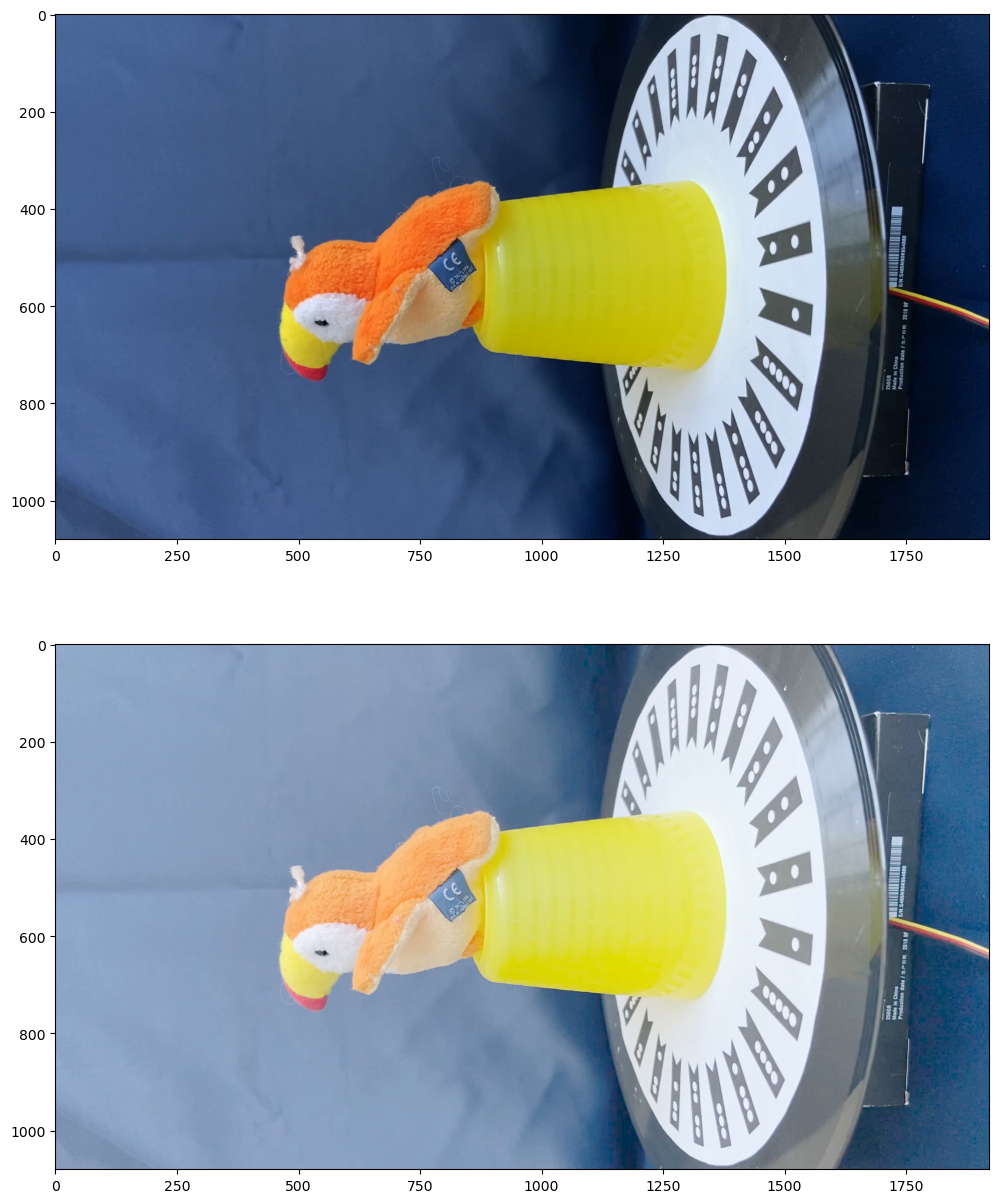

In [4]:
img = cv.imread('Data\Frame\obj1.jpg' )
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gamma_img = gammaCorrection(img, 2.2)
gamma_img = cv.cvtColor(gamma_img, cv.COLOR_BGR2RGB)
print(gamma_img.shape)
plt.figure( figsize=(15,15)) 
plt.subplot(2,1,1)
plt.imshow(img_rgb )
plt.subplot(2,1,2)
plt.imshow(gamma_img )

Before applying morfological operation

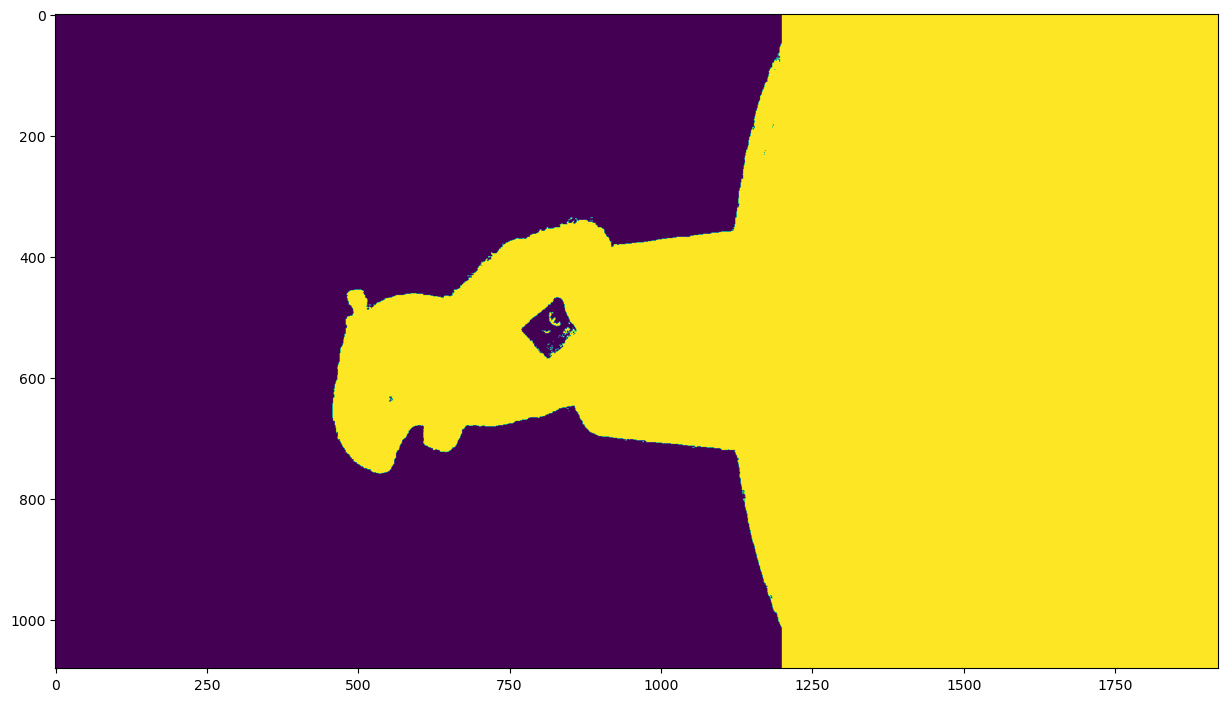

In [48]:
# convert to YUV model color
img_yuv = cv.cvtColor(gamma_img, cv.COLOR_RGB2YUV)
UV = img_yuv[:,:,1:3] / 255.0 - 0.5 
# we choosed 0.4 -0.4 based on the UV plane (blue)
mask = chroma_distance( UV, 0.4, -0.4 )
# correspond to left part of the image that correspond always to foreground 
mask[:,1200:] = 0.51
# right part of the image 
mask[:,:250] = 0.4
# color pixel:
# foreground white
mask[mask > 0.5 ] = 255
# background black
mask[mask <= 0.5 ] = 0
plt.figure( figsize=(15,15)) 
plt.imshow(mask)
